In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from dotenv import load_dotenv
from pandas.plotting import parallel_coordinates
import importlib
import plotly.express as px
import os
import glob
import pandas as pd
import json

import utils.db_tools as db_tools
from utils.db_tools import (
    get_db,
    filter_df,
    make_animation,
    get_data,
    metrics_grid,
    plot_grid,
    compute_metrics,
    plot_all_trajectories
)

from classify import classify_trajectories

importlib.reload(db_tools)

<module 'utils.db_tools' from '/cluster/home/vogtva/pde-solvers-cuda/analysis/utils/db_tools.py'>

In [5]:
model = "bruss"
run_id = "phase_transition"
load_dotenv()
data_dir = os.getenv("DATA_DIR")
output_dir = os.getenv("OUT_DIR")

output_dir = os.path.join(output_dir, model, run_id)
df = pd.read_csv(os.path.join(output_dir, "classification_metrics.csv"))
df_class = classify_trajectories(df)
df = df_class.copy()
df = df[df["filename"].apply(os.path.exists)].reset_index(drop=True)

A = 0.50


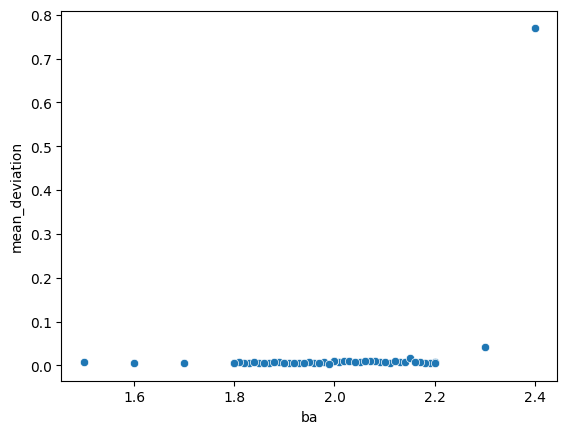

A = 0.60


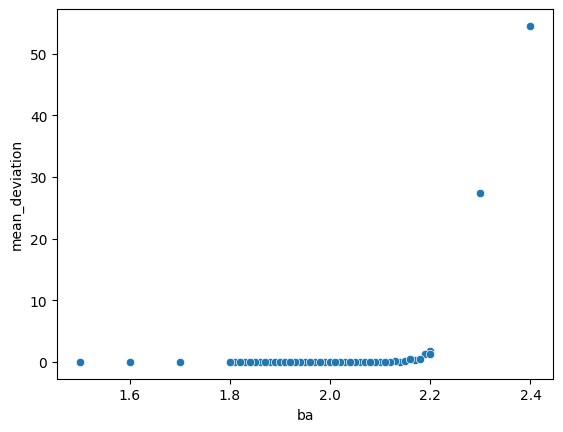

A = 0.70


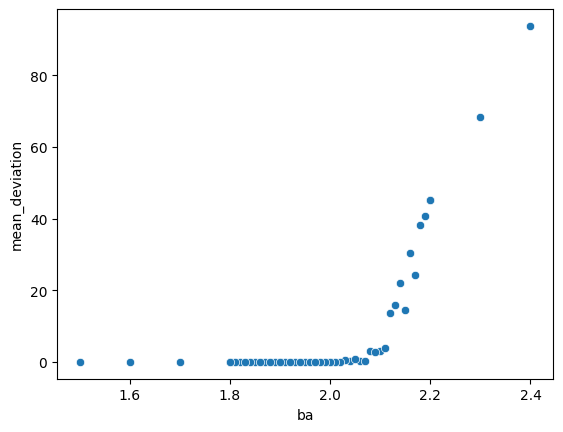

A = 0.80


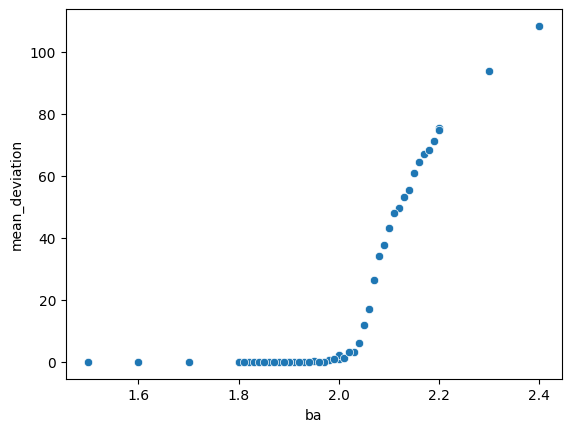

A = 0.90


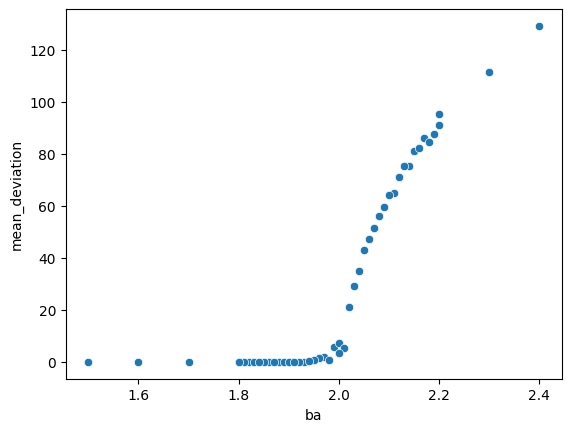

A = 1.00


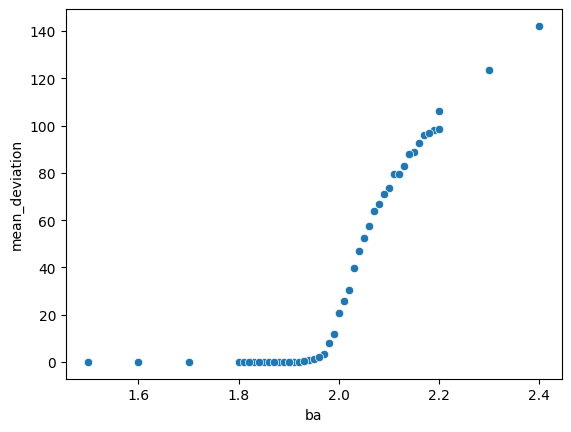

A = 1.10


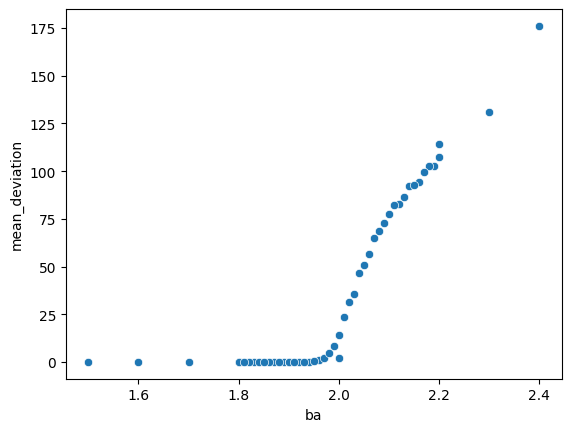

A = 1.20


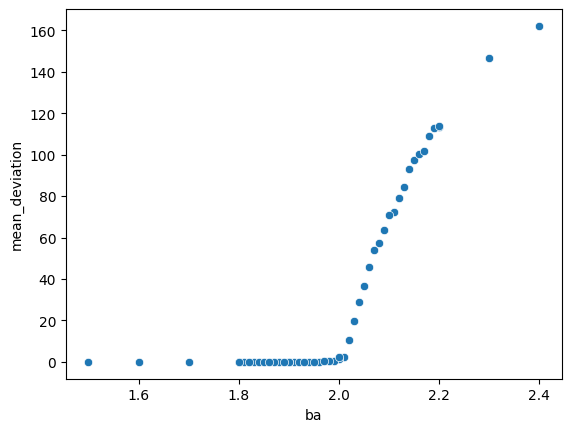

A = 1.30


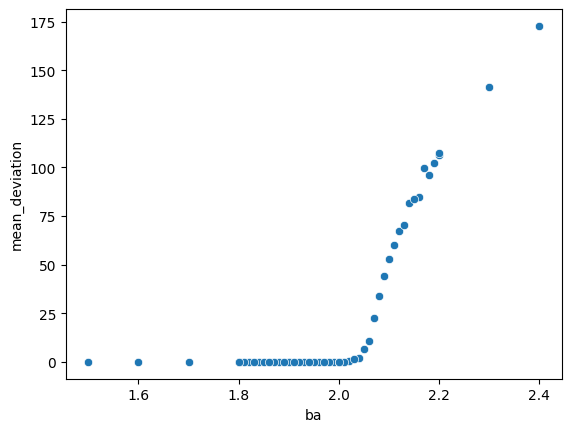

A = 1.40


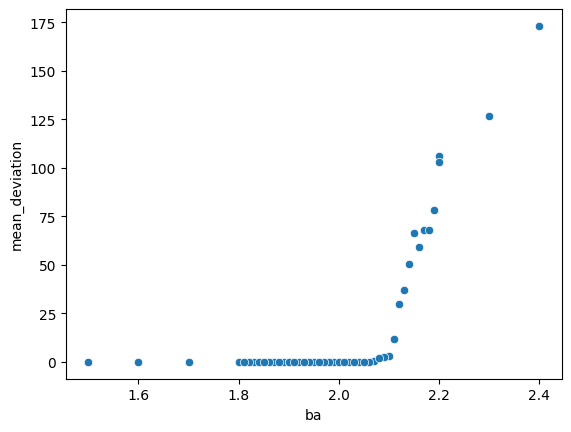

A = 1.50


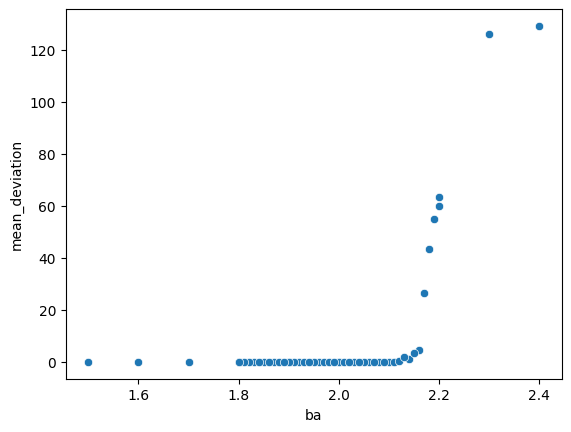

A = 1.60


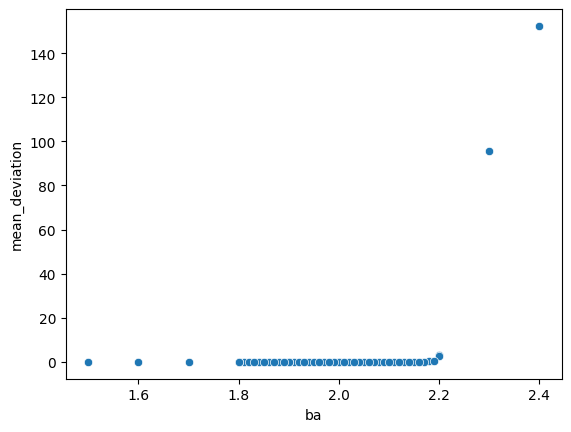

A = 1.70


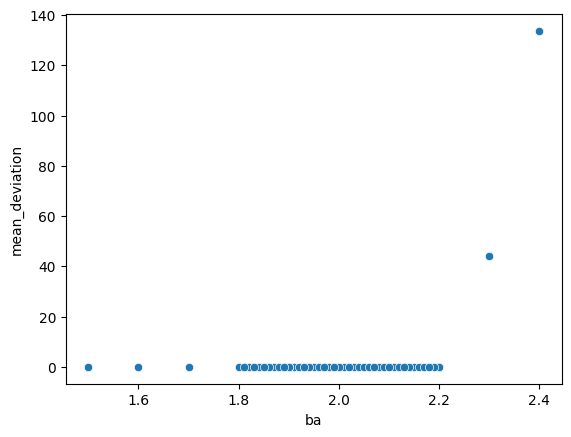

A = 1.80


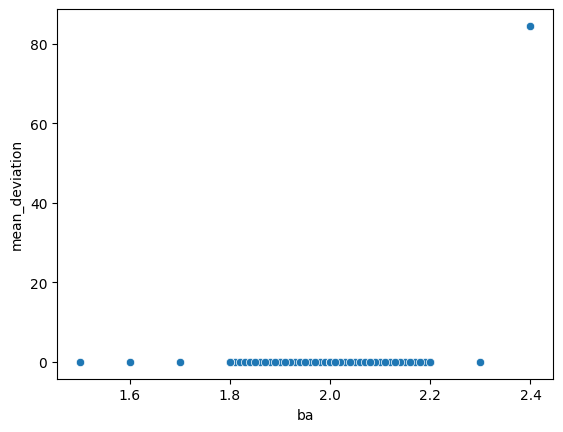

A = 1.90


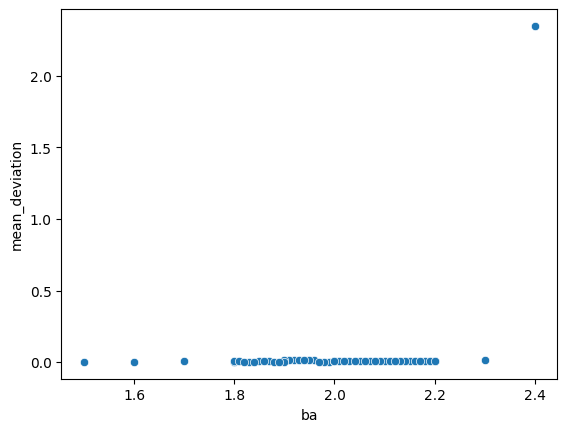

A = 2.00


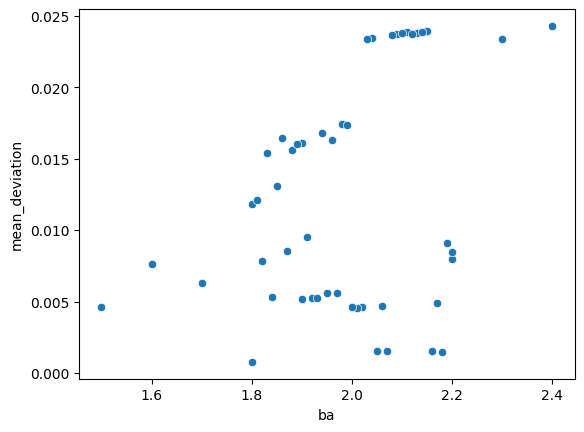

A = 2.10


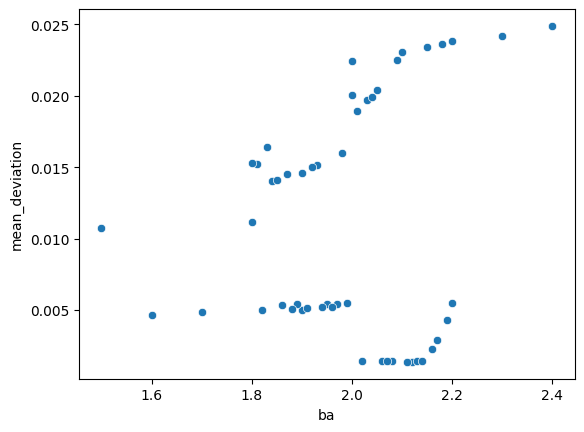

A = 2.20


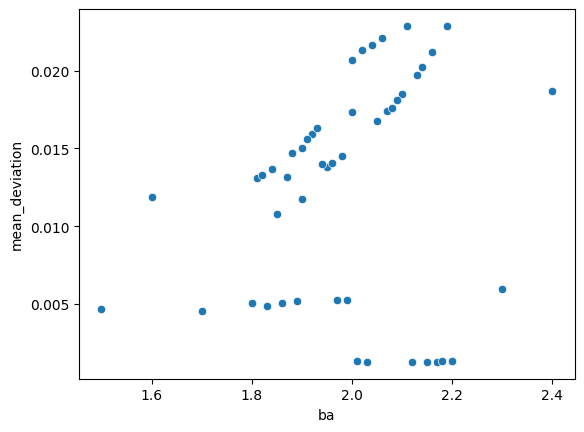

A = 2.30


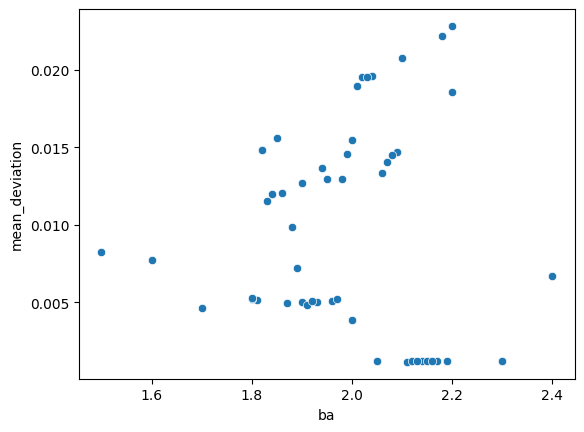

A = 2.40


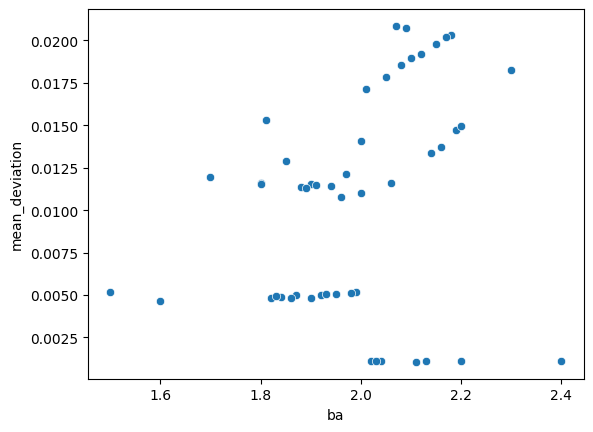

In [10]:
df.loc[:, "ba"] = df["B"] / df["A"]

for A, df_filt in df.groupby("A"):
    print(f"A = {A:.2f}")
    metric = "mean_deviation"
    sns.scatterplot(data=df_filt, x='ba', y=metric) #, ax=axes[0])
    plt.show()

In [22]:
df_filt = df[np.round(df.A, decimals=1) == 1.2]
df_filt = df_filt.sort_values("ba")
print(df_filt[["ba", "mean_deviation"]])

       ba  mean_deviation
330  1.50        0.011793
503  1.60        0.004587
853  1.70        0.012832
480  1.80        0.013328
611  1.80        0.013328
523  1.81        0.013405
964  1.82        0.013421
509  1.83        0.013498
681  1.84        0.013498
713  1.85        0.013576
953  1.86        0.013653
583  1.87        0.014081
166  1.88        0.014350
934  1.89        0.014375
308  1.90        0.014661
757  1.90        0.014648
27   1.91        0.014615
427  1.92        0.014935
867  1.93        0.018359
572  1.94        0.029155
626  1.95        0.027382
95   1.96        0.144589
995  1.97        0.342659
919  1.98        0.322333
397  1.99        0.637780
973  2.00        2.504087
298  2.00        1.430918
160  2.01        2.599283
890  2.02       10.558225
167  2.03       19.638378
354  2.04       29.072495
706  2.05       36.644230
288  2.06       45.802532
834  2.07       53.935223
778  2.08       57.461840
278  2.09       63.793213
967  2.10       70.933876
122  2.11   